# <Strong> TASK-3 LINEAR REGRESSION MODEL

This file contains task-3 operations performed by using Polynomial Regression model (carat_weight) as mentioned in the questions.

## <Strong> 1. Importing necessary Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/CSV /Diamond/diamonds.csv")

## <Strong> 2. Data Preprocessing and Data Transformation

### <Strong> Description

In [ ]:
dataset.head(3)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200


In [ ]:
dataset.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [ ]:
dataset.shape

(219703, 26)

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

### <Strong> Finding How much Unknown Data

In [ ]:
# Dropping first column from dataframe
dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

In [ ]:
dataset.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [ ]:
# 1. cut
cut_values = dataset['cut'].value_counts()
cut_values

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: cut, dtype: int64

In [ ]:
# 2. COLOR
color_values = dataset['color'].value_counts()
color_values

E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: color, dtype: int64

In [ ]:
# 3.CLARITY
clarity_values = dataset['clarity'].value_counts()
clarity_values

SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [ ]:
#4. CARAT WEIGHT
carat_weight_values = dataset['carat_weight'].value_counts()
carat_weight_values

0.30     33075
0.50     18242
0.40     10998
0.31      8897
1.00      8209
         ...  
7.75         1
8.41         1
10.79        1
6.69         1
18.07        1
Name: carat_weight, Length: 878, dtype: int64

In [ ]:
# 5. CUT QUALITY
cut_quality_values = dataset['cut_quality'].value_counts()
cut_quality_values

Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64

In [ ]:
# 6. LAB
lab_values = dataset['lab'].value_counts()
lab_values

GIA    200434
IGI     15865
HRD      3404
Name: lab, dtype: int64

In [ ]:
# 7. SYMMETRY
symmetry_values = dataset['symmetry'].value_counts()
symmetry_values

Excellent    131619
Very Good     83143
Good           4609
Fair            325
Poor              7
Name: symmetry, dtype: int64

In [ ]:
# 8. POLISH
polish_values = dataset['polish'].value_counts()
polish_values

Excellent    175806
Very Good     42323
Good           1565
Fair              7
Poor              2
Name: polish, dtype: int64

unknown       156916
Yes            61931
Borderline       515
E1               300
No                41
Name: eye_clean, dtype: int64


<Axes: ylabel='eye_clean'>

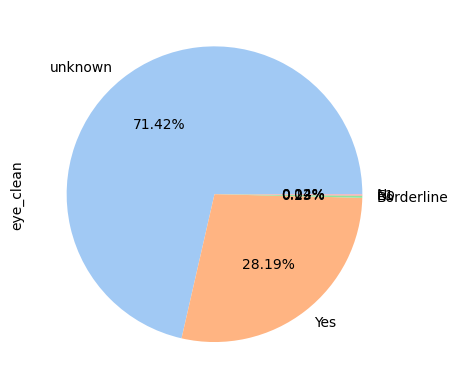

In [ ]:
# 9. EYE CLEAN (Remove this because 71.42% unknown values)
eye_clean_values = dataset['eye_clean'].value_counts()
print(eye_clean_values)
piec_colors = sns.color_palette('pastel')[0:len(eye_clean_values)]
eye_clean_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

N          131899
unknown     85740
VS           1345
S             476
M             163
L              58
SL             14
EL              4
VL              4
Name: culet_size, dtype: int64


<Axes: ylabel='culet_size'>

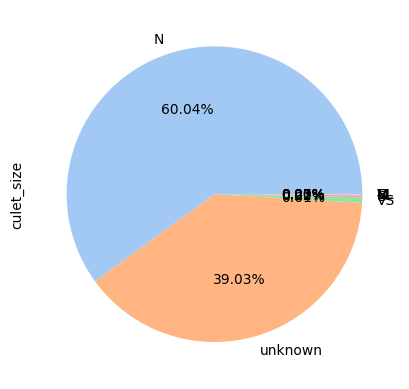

In [ ]:
# 10. CULET SIZE (39.03% unknown) (handle unknowns with mode)
culet_size_values = dataset['culet_size'].value_counts()
print(culet_size_values)
piec_colors = sns.color_palette('pastel')[0:len(culet_size_values)]
culet_size_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='culet_condition'>

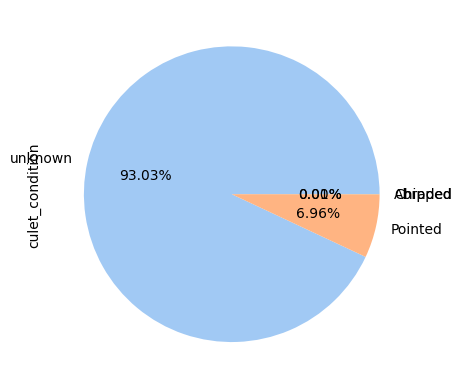

In [ ]:
# 11. CULET CONDITION (Remove this because 93.03% unknown values)
culet_condition_values = dataset['culet_condition'].value_counts()
culet_condition_values
piec_colors = sns.color_palette('pastel')[0:len(culet_condition_values)]
culet_condition_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#12. DEPTH PERCENT
depth_percent_values = dataset['depth_percent'].value_counts()
depth_percent_values

62.6    7992
62.7    7921
62.5    7765
62.4    7309
62.8    7240
        ... 
86.8       1
25.9       1
42.7       1
42.4       1
37.6       1
Name: depth_percent, Length: 534, dtype: int64

In [ ]:
#13. TABLE PERCENT
table_percent_values = dataset['table_percent'].value_counts()
table_percent_values

57.0    37918
58.0    32384
56.0    30295
59.0    25638
60.0    19396
        ...  
66.6        1
55.9        1
70.9        1
64.3        1
13.5        1
Name: table_percent, Length: 235, dtype: int64

In [ ]:
#14. MEAS LENGTH
meas_length_values = dataset['meas_length'].value_counts()
meas_length_values

4.27     2971
4.26     2888
4.28     2860
4.25     2752
4.29     2681
         ... 
2.95        1
2.79        1
16.24       1
15.69       1
17.06       1
Name: meas_length, Length: 1415, dtype: int64

In [ ]:
#15. MEAS WIDTH
meas_width_values = dataset['meas_width'].value_counts()
meas_width_values

4.29     3608
4.30     3454
4.28     3369
4.31     2974
4.32     2835
         ... 
13.29       1
13.34       1
15.32       1
14.39       1
17.10       1
Name: meas_width, Length: 1155, dtype: int64

In [ ]:
#16. MEAS DEPTH
meas_depth_values = dataset['meas_depth'].value_counts()
meas_depth_values

2.68     5970
2.69     5500
2.67     5057
2.70     3960
2.66     3941
         ... 
68.10       1
58.60       1
43.30       1
9.90        1
10.20       1
Name: meas_depth, Length: 852, dtype: int64

unknown    83432
M          74421
STK        26335
TN         16744
TK         10353
VTK         4471
XTK         1981
VTN         1650
XTN          292
STN           24
Name: girdle_min, dtype: int64


<Axes: ylabel='girdle_min'>

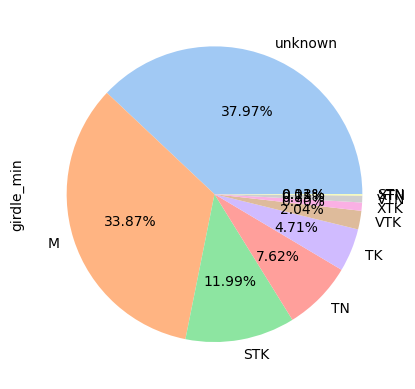

In [ ]:
# 17. GIRDLE MIN (37.97% unknown need to handle)
girdle_min_values = dataset['girdle_min'].value_counts()
print(girdle_min_values)
piec_colors = sns.color_palette('pastel')[0:len(girdle_min_values)]
girdle_min_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown    84295
STK        70440
TK         25186
M          17977
VTK        12638
XTK         7647
TN          1363
VTN          111
XTN           34
STN           12
Name: girdle_max, dtype: int64


<Axes: ylabel='girdle_max'>

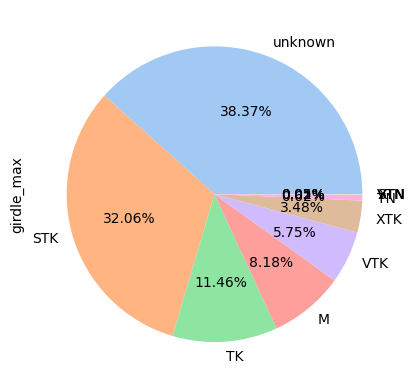

In [ ]:
# 18. GIRDLE MAX (38.37% unknown need to handle)
girdle_max_values = dataset['girdle_max'].value_counts()
print(girdle_max_values)
piec_colors = sns.color_palette('pastel')[0:len(girdle_max_values)]
girdle_max_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown    203977
Blue        15219
Yellow        400
Green          55
White          42
Orange         10
Name: fluor_color, dtype: int64


<Axes: ylabel='fluor_color'>

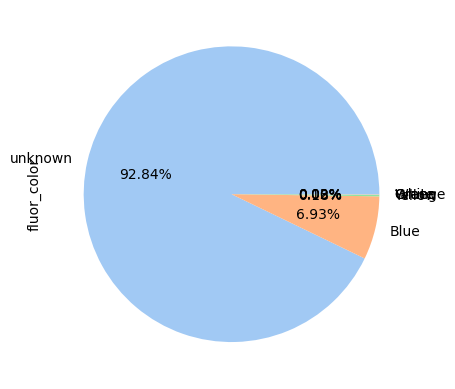

In [ ]:
#19. FLOUR COLOR (Remove this because 92.84% unknown values)
fluor_color_values = dataset['fluor_color'].value_counts()
print(fluor_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fluor_color_values)]
fluor_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

None           143491
Faint           38302
Medium          20705
Strong          13243
Very Slight      2729
Very Strong      1093
unknown           128
Slight             12
Name: fluor_intensity, dtype: int64


<Axes: ylabel='fluor_intensity'>

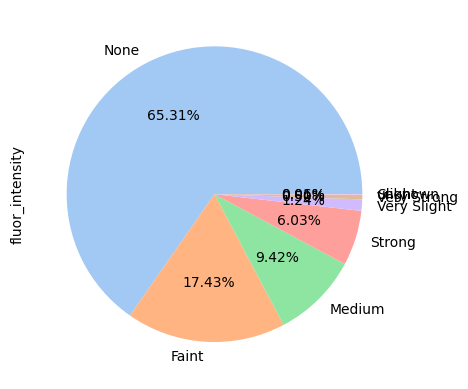

In [ ]:
#20. FLOUR INTENSITY (Remove this because 65.31% unknown values)
fluor_intensity_values = dataset['fluor_intensity'].value_counts()
print(fluor_intensity_values)
piec_colors = sns.color_palette('pastel')[0:len(fluor_intensity_values)]
fluor_intensity_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown      210539
Yellow         6487
Pink           1369
Brown           531
Green           302
Orange          271
Purple           76
Gray             66
Blue             38
Chameleon        12
Black             6
Red               4
Other             2
Name: fancy_color_dominant_color, dtype: int64


<Axes: ylabel='fancy_color_dominant_color'>

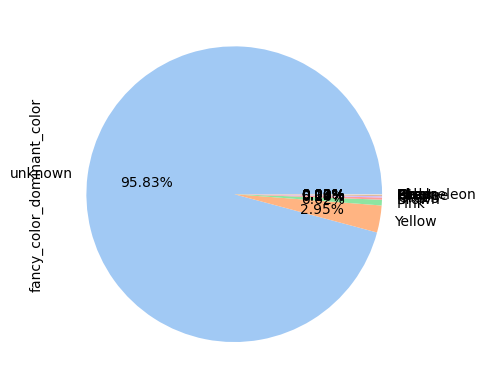

In [ ]:
#21. FANCY COLOR DOMINANT COLOR (Remove this because 95.83% unknown values)
fancy_color_dominant_color_values = dataset['fancy_color_dominant_color'].value_counts()
print(fancy_color_dominant_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_dominant_color_values)]
fancy_color_dominant_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown    218641
Brown         306
Yellow        239
Orange        155
Pink          126
Green         105
Purple         81
Gray           36
Blue           11
Violet          2
Red             1
Name: fancy_color_secondary_color, dtype: int64


<Axes: ylabel='fancy_color_secondary_color'>

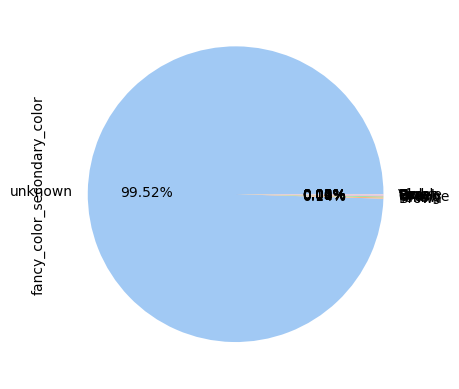

In [ ]:
#22. FANCY COLOR SECONDARY COLOR (Remove this because 99.52% unknown values)
fancy_color_secondary_color_values = dataset['fancy_color_secondary_color'].value_counts()
print(fancy_color_secondary_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_secondary_color_values)]
fancy_color_secondary_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown      217665
None           1650
Brownish        123
Yellowish        78
Orangey          54
Pinkish          51
Greenish         47
Purplish         34
Grayish           1
Name: fancy_color_overtone, dtype: int64


<Axes: ylabel='fancy_color_overtone'>

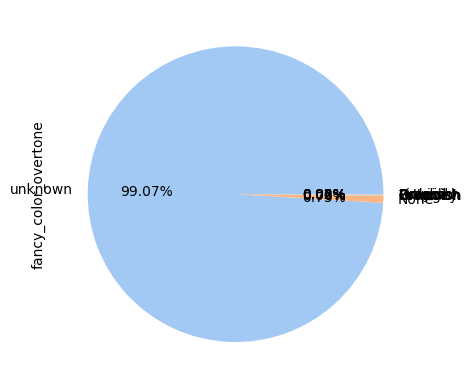

In [ ]:
#23.  FANCY COLOR OVERTONE (Remove this because 99.07% unknown values)
fancy_color_overtone_values = dataset['fancy_color_overtone'].value_counts()
print(fancy_color_overtone_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_overtone_values)]
fancy_color_overtone_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

unknown          210541
Fancy              3447
Fancy Intense      1943
Fancy Light        1288
Fancy Deep          777
Fancy Vivid         714
Light               318
Faint               238
Fancy Dark          238
Very Light          199
Name: fancy_color_intensity, dtype: int64


<Axes: ylabel='fancy_color_intensity'>

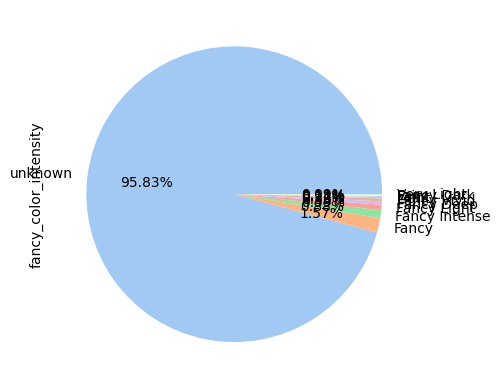

In [ ]:
#24. FANCY COLOR INTENSITY (Remove this because 95.83% unknown values)
fancy_color_intensity_values = dataset['fancy_color_intensity'].value_counts()
print(fancy_color_intensity_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_intensity_values)]
fancy_color_intensity_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

Here , we dropping columns which have more than 65% unknown values.
1.   eye_clean (71.42%)
2.   culet_condition (93.3%)
3.   flour color (92.84%)
4. flour_intensity (65.31%)
5. fancy_color_dominant_color (95.83%)
6. fancy_color_secondary_color (99.52%)
7. fancy_color_overtone ( 99.07%)
8. fancy_color_intensity (95.83%)





In [ ]:
#Drooping columns from dataframe
dropped_features = ['eye_clean', 'culet_condition' , 'fluor_color' , 'fluor_intensity' , 'fancy_color_dominant_color', 'fancy_color_secondary_color' , 'fancy_color_overtone' , 'fancy_color_intensity', 'girdle_min' , 'girdle_max' ]
dataset.drop(columns=dropped_features, inplace=True)


In [ ]:
dataset.head(5)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200


In [ ]:
# remaining columns after dropping
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cut                219703 non-null  object 
 1   color              219703 non-null  object 
 2   clarity            219703 non-null  object 
 3   carat_weight       219703 non-null  float64
 4   cut_quality        219703 non-null  object 
 5   lab                219703 non-null  object 
 6   symmetry           219703 non-null  object 
 7   polish             219703 non-null  object 
 8   culet_size         219703 non-null  object 
 9   depth_percent      219703 non-null  float64
 10  table_percent      219703 non-null  float64
 11  meas_length        219703 non-null  float64
 12  meas_width         219703 non-null  float64
 13  meas_depth         219703 non-null  float64
 14  total_sales_price  219703 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 25

### <strong> Handling Unknown Data


In [ ]:
#Finding MODE (color, cut_quality, culet_size)

#1. color
color_mode = dataset['color'].mode().values[0]
print("Mode Value of Color : ",color_mode)

#2. cut_quality
cut_quality_mode =  dataset['cut_quality'].mode().values[0]
print("Mode Value of Cut quality: " , cut_quality_mode)

#3. culet_size
culet_size_mode = dataset['culet_size'].mode().values[0]
print("Mode Value of culet size ", culet_size_mode)



Mode Value of Color :  E
Mode Value of Cut quality:  Excellent
Mode Value of culet size  N


In [ ]:
# Replacing unkonown values with MODE (color, cut_quality, culet_size)

# 1. replacing unknown in color (E)
dataset.loc[dataset['color']== 'unknown', "color"] = color_mode
color_values = dataset['color'].value_counts()
print(color_values)
print("--------------------------------------------------")

# 2. replacing unknown in cut_quality (Excellent)
dataset.loc[dataset['cut_quality']== 'unknown', "cut_quality"] = cut_quality_mode
cut_quality_values = dataset['cut_quality'].value_counts()
print(cut_quality_values)
print("--------------------------------------------------")

#3. replacing unknown in culet_size (N)
dataset.loc[dataset['culet_size']== 'unknown', "culet_size"] = culet_size_mode
culet_size_values = dataset['culet_size'].value_counts()
print(culet_size_values)

E    42265
F    31566
D    30873
G    29184
H    26073
I    22364
J    16898
K    11750
L     5683
M     3047
Name: color, dtype: int64
--------------------------------------------------
Excellent    185468
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64
--------------------------------------------------
N     217639
VS      1345
S        476
M        163
L         58
SL        14
EL         4
VL         4
Name: culet_size, dtype: int64


### <strong> Label Encoding

In [ ]:
dataset.shape

(219703, 15)

In [ ]:
dataset.head(10)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,200
5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,60.8,57.0,2.95,2.99,1.81,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,64.0,57.0,2.85,2.88,1.84,200
7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.1,59.5,2.86,2.89,1.78,200
8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,63.5,59.5,2.89,2.92,1.85,200
9,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,63.2,57.0,2.83,2.87,1.80,200


In [ ]:
#Label encoding for  column (cut , color , clarity , cut_quality , lab , symmetry , polish , culet_size)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['cut'] =label_encoder.fit_transform(dataset['cut'])
dataset['color'] =label_encoder.fit_transform(dataset['color'])
dataset['clarity'] =label_encoder.fit_transform(dataset['clarity'])
dataset['cut_quality'] =label_encoder.fit_transform(dataset['cut_quality'])
dataset['lab'] =label_encoder.fit_transform(dataset['lab'])
dataset['symmetry'] =label_encoder.fit_transform(dataset['symmetry'])
dataset['polish'] =label_encoder.fit_transform(dataset['polish'])
dataset['culet_size'] =label_encoder.fit_transform(dataset['culet_size'])
dataset.head(5)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,10,1,10,0.09,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79,200
1,10,1,10,0.09,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78,200
2,10,1,10,0.09,0,2,4,4,3,61.1,59.0,2.88,2.90,1.77,200
3,10,1,10,0.09,0,2,4,4,3,62.0,59.0,2.86,2.88,1.78,200
4,10,1,10,0.09,4,2,4,0,3,64.9,58.5,2.79,2.83,1.82,200


In [ ]:
# selected_features = ['carat_weight' , 'depth_percent' , 'table_percent' , 'meas_length' , 'meas_width' , 'meas_depth']
# target_variable = "total_sales_price"

# sns.set(style="ticks")
# sns.pairplot(dataset, hue=target_variable, vars=selected_features, diag_kind="kde")
# plt.show()

### <strong> Correlation Matrix

In [ ]:
# Finding Correlation
correlation_matrix = dataset.corr()
correlation_matrix

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
cut,1.000000,0.098777,0.011213,-0.233341,0.216586,0.065103,-0.390334,-0.192917,-0.002536,-0.127451,-0.157866,-0.340470,-0.026820,-0.049159,-0.107148
color,0.098777,1.000000,0.000485,0.130242,0.064841,0.169668,-0.044153,-0.046906,0.003860,0.003233,-0.001475,0.135174,0.192440,0.075863,-0.007384
clarity,0.011213,0.000485,1.000000,-0.082284,-0.017915,0.002290,-0.038009,-0.061063,-0.004698,0.030218,0.012728,-0.126235,-0.113816,-0.041535,-0.007052
carat_weight,-0.233341,0.130242,-0.082284,1.000000,-0.066903,0.070986,0.037661,0.002669,0.030321,0.061724,0.090697,0.782683,0.788912,0.350719,0.745963
cut_quality,0.216586,0.064841,-0.017915,-0.066903,1.000000,0.061338,0.281407,0.157609,0.045556,-0.038349,-0.064248,-0.116540,-0.018848,-0.003841,-0.047238
lab,0.065103,0.169668,0.002290,0.070986,0.061338,1.000000,-0.002012,0.036027,-0.020674,-0.225310,-0.107094,0.029830,0.060569,0.032218,0.009814
symmetry,-0.390334,-0.044153,-0.038009,0.037661,0.281407,-0.002012,1.000000,0.367896,0.048912,0.059054,0.071771,0.127476,-0.070909,-0.009535,-0.008895
polish,-0.192917,-0.046906,-0.061063,0.002669,0.157609,0.036027,0.367896,1.000000,0.054448,-0.014940,0.011552,0.038587,-0.077771,-0.013053,-0.003066
culet_size,-0.002536,0.003860,-0.004698,0.030321,0.045556,-0.020674,0.048912,0.054448,1.000000,-0.002453,0.011443,0.039201,0.040418,0.012378,0.027186
depth_percent,-0.127451,0.003233,0.030218,0.061724,-0.038349,-0.225310,0.059054,-0.014940,-0.002453,1.000000,0.673835,0.128791,0.119692,0.086477,0.025408


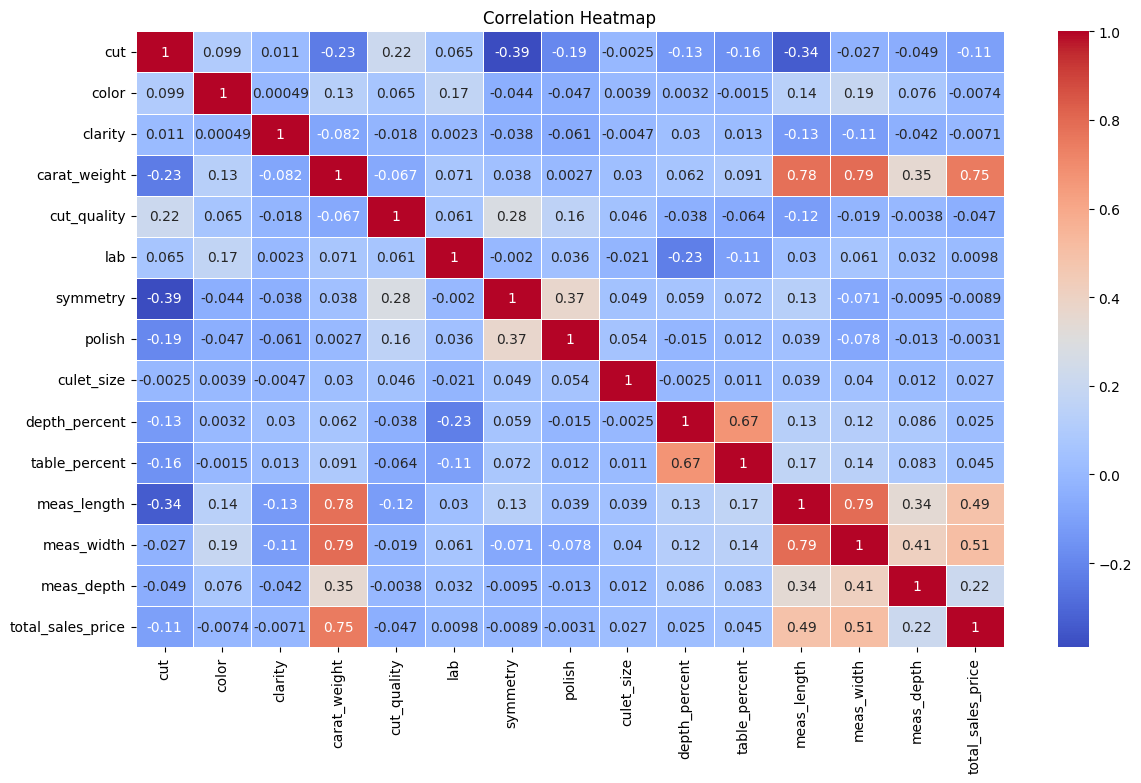

In [ ]:
# ploting correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dataset.shape

(219703, 15)

In [ ]:

target_name = dataset.columns[3]
print(target_name)
target = dataset[target_name]
features = dataset.drop(columns=[target_name])



carat_weight


In [ ]:
features.head(3)

,cut,color,clarity,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,10,1,10,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79,200
1,10,1,10,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78,200
2,10,1,10,0,2,4,4,3,61.1,59.0,2.88,2.90,1.77,200


In [ ]:
target.head(3)

0    0.09
1    0.09
2    0.09
Name: carat_weight, dtype: float64

## <Strong>3.Finding Best Polynomial model based on Degree and Model Evaluation


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)


In [ ]:
degrees = [1, 2, 3,]
rmse_scores = []

for degree in degrees:
    # Transform features to include polynomial terms up to 'degree'
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate RMSE on the test set
    mse = mean_squared_error(y_test, y_pred , squared=False)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

   # calculate Relative RMSE on the test set
    relative_rmse = (rmse/dataset['carat_weight'].mean())*100

    # calculate MAE on the test set
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (R2) on the test set
    score = r2_score(y_test,y_pred)


    print(f"RMSE of degree {degree} :", rmse)
    print(f"Relative RMSE of degree {degree} :", relative_rmse)
    print(f"R2 Score of degree {degree} :", score)
    print(f"MAE of degree {degree} :", mae)
    print("______________________________________")

RMSE of degree 1 : 0.5895238046888922
Relative RMSE of degree 1 : 78.0644030958381
R2 Score of degree 1 : 0.8333744304048207
MAE of degree 1 : 0.14530495140501726
______________________________________
RMSE of degree 2 : 0.9466123997391502
Relative RMSE of degree 2 : 125.34986943869546
R2 Score of degree 2 : -0.10770729936838985
MAE of degree 2 : 0.05858582555274424
______________________________________
RMSE of degree 3 : 1.6289893447567747
Relative RMSE of degree 3 : 215.70983196348962
R2 Score of degree 3 : -8.714249101170214
MAE of degree 3 : 0.06901986772569864
______________________________________


From above Score linear function instead of polynomial best fit to the predict carat_weight

## <Strong> 4. Hyperparameter Tuning and Model Evaluation




In [ ]:

ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10,100 , 1000],        # Regularization strength for Ridge regression
    'fit_intercept': [True, False],            # Whether to fit the intercept
}


# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = Ridge(**best_params)
poly_features = PolynomialFeatures(degree=1) # here taking degree 1 from the above results
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
best_model.fit(X_train_poly, y_train)




Ridge(alpha=100)

In [ ]:
y_pred_tune = best_model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tune , squared = False))
relative_rmse = (rmse/dataset['carat_weight'].mean())*100
mae = mean_absolute_error(y_test, y_pred_tune)
score = r2_score(y_test,y_pred_tune)

print("Best Hyperparameters:")
print(best_params)
print(f'After hyperparameter tuning , RMSE on Test Set: {rmse:.2f}')
print(f'After hyperparameter tuning , Relative_RMSE on Test Set: {relative_rmse:.2f}')
print(f"After hyperparameter tuning ,MAE of degree {degree} :", mae)
print(f"After hyperparameter tuning , R2 Score of degree 1 :", score)

Best Hyperparameters:
{'alpha': 100, 'fit_intercept': True}
After hyperparameter tuning , RMSE on Test Set: 0.59
After hyperparameter tuning , Relative_RMSE on Test Set: 78.06
After hyperparameter tuning ,MAE of degree 3 : 0.1452808228766697
After hyperparameter tuning , R2 Score of degree 1 : 0.8333897274243536
